# A little more complicated

### Introduction

In the last lesson, we started with a machine learning algorithm that found the true relationship between customers and temperature beneath our data: 

$$customers = 3*temperature + 10$$

Then we showed that even when our model finds this true relationship, it cannot perfectly predict data that has a degree of randomness in it.  This is called *irreducible error*.

Now we'll make things harder for our machine learning algorithm.  Unlike in the last lesson, we won't *train* our algorithm on a perfectly clean dataset.  In other words, this time our machine learning algorithm won't have the benefit of training on data that perfectly reflects the true underlying model.

This is more realistic.  In real life, we don't train our model that perfectly matches a linear model.  The data we collect will be subject to a degree of randomness -- or in other words, noise.  In this lesson, we'll see the complications that arise from training on noisy data.

### Training on a noisy dataset

Once again, we have our customer model of the following:

$$customers = 3*temperature + 10 + \epsilon_i $$

Let's get our data.

In [10]:
import pandas as pd
df = pd.read_csv('./customers_with_errors.csv', index_col = 0)

In [11]:
df[:3]

,temperatures,customers
0,60,195
1,68,221
2,43,109


Our `dataset` has our feature of temperatures, and a target of customers.

In [17]:
temperatures = df['temperatures'].to_numpy()
noisy_customers = df['customers']

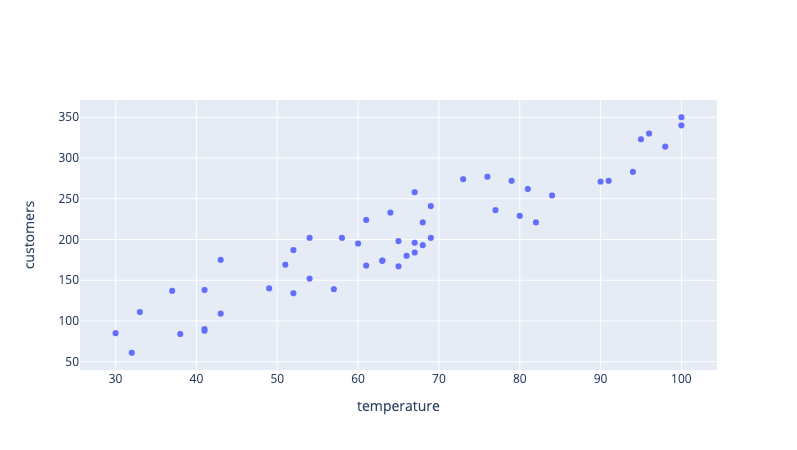

In [18]:
import plotly.graph_objects as go
data_trace = go.Scatter(x = temperatures, y = noisy_customers, name = 'initial data', mode = 'markers')
layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
go.Figure([data_trace], layout = layout)

Ok, let's train our model on this noisy dataset.

In [38]:
from sklearn.linear_model import LinearRegression
initial_model = LinearRegression()
sorted_idx = np.argsort(temperatures)
sorted_temps = temperatures[sorted_idx]
sorted_customers = noisy_customers[sorted_idx]
initial_model.fit(sorted_temps.reshape(-1, 1), sorted_customers)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's see if the model discovered the underlying model of $y = 3x + 10 + \epsilon_i$. 

In [39]:
initial_model.coef_

array([3.49140605])

In [40]:
initial_model.intercept_

-24.212252962233208

Now notice that when we train our data on the noisy data, our model came close to discovering the model of $y = 3x + 10$, but it was a little off.  Why *is* this?  Why did it not say that the best fit line has the underlying parameters of $y = 3x + 10$.

### Introducing Variance

Well here, our hypothesis function did not find the parameters of the true model because whenever we train our model, the model is simply trying to draw a line that minimizes the sum of the squared errors through the random data.  And because of this, the hypothesis function is influenced by the whims and randomness it sees in the data. 

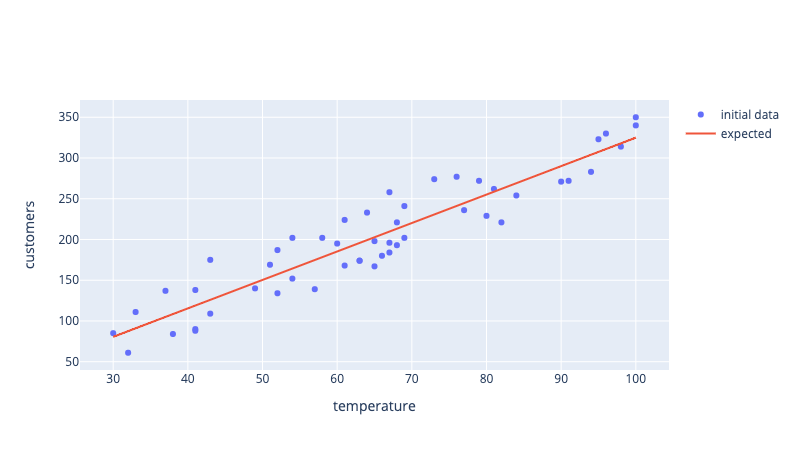

In [44]:
import numpy as np
import plotly.graph_objects as go

data_trace = go.Scatter(x = temperatures, y = noisy_customers, name = 'initial data', mode = 'markers')
customer_predictions = initial_model.predict(sorted_temps.reshape(-1, 1))
model_trace = go.Scatter(x = sorted_temps, y = customer_predictions, name = 'expected', mode = 'lines')
go.Figure([data_trace, model_trace], layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}})

Now let's see how well the model performs.

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(noisy_customers, initial_model.predict(temperatures.reshape(-1, 1))))

25.303665437086153

This time, in addition to suffering from irreducible error, our model also suffers from variance.  Variance measures the amount of that our parameters change each time that we estimate the model.  And our parameters would change because the our models are trained on different subsets of our random data.  

By way of example, let's train our model on four hundred different sets of data that have an element of randomness in it.

> To do so, we'll load up our perfect customers.

In [120]:
import pandas as pd 
perfect_df = pd.read_csv('./perfect_customers.csv')
temps = perfect_df['temperatures'].to_numpy()
perfect_customers = perfect_df['customers']

And then, 1000 times, we'll add randomness to each dataset.  And then train a model.

In [121]:
models = []
for training_set in range(0, 1000):
    random_error = random.randint(-30, 30, 50)
    noisy_customers = perfect_customers + random_error
    
    
    model = LinearRegression()
    model.fit(temps.reshape(-1, 1), noisy_customers)
    models.append(model)

parameters = np.array([(model.coef_, model.intercept_) for model in models])

Let's now see the average parameters measured.

In [129]:
np.average(parameters, axis = 0)

array([array([3.00086505]), 9.424257237593643], dtype=object)

Here, we can see that our parameters are much closer to the underlying model than when we just performed one estimate.

So we just saw the two main points with variance.  
1. If we trained our model many times with data that random variations, the parameters of our model would vary each time and this variation from the true parameter is called error due to variance.  
2. However, if we were to perform fit our model many times, we expect each estimated parameter to hover around the true parameter and, for the average of each parameter to approach the parameter of the true model. 

### Summary

In this lesson, we learned about error due to variance.  Error due to variance occurs because we train on data that has randomness built into it.  Because of this if we imagined (or actually did) train our model on different multiple times, the parameters of our model would vary each time.  This fluctuation is called variance.  Now because this variance is random, if we were to take the average of the parameters we would expect the error due to variance to cancel each other out, and thus equal zero.  We saw a demonstration of this, when we averaged our models, and the parameters approached the true model parameters.

We saw that one danger of error due to variance is overfitting.  We have overfitting when our model performs better on data it trained on than on data it did not yet see.  This problem is referred to as a problem of generalization.

